In [3]:
import pandas as pd
import numpy as np
parking_meter = pd.read_csv("/Users/jianxiongshen/Downloads/parking_meter.csv")

In [4]:
print(np.median(parking_meter.meter_rate))
print(sum(parking_meter.meter_rate > 5))
# Answer to question 1: The median meter rate is 2 dollars. 1093 meters have a rate that is greater than five dollars.

2.0
1093


In [5]:
print(9975 - (parking_meter.pay_phone.count()))
# Answer to question 2: There are 57 missing values in the pay_phone variable.

57


In [6]:
unique_rates = parking_meter.meter_rate.unique()
print(parking_meter.groupby(['meter_rate'])['meter_rate'].count())
# Answer to question 3: There are 13 unique meter rates in this dataset. Meter rate 1.0 is the most common this dataset.

meter_rate
0.5      52
1.0    3700
1.5      19
2.0    1954
2.5      11
3.0    1365
3.5       7
4.0     895
5.0     879
6.0     494
7.0     361
8.0     170
9.0      68
Name: meter_rate, dtype: int64


In [7]:
print(np.mean(parking_meter.meter_rate[parking_meter.credit_card == 'Yes']))
print(np.mean(parking_meter.meter_rate[parking_meter.credit_card == 'No']))
# Answer to question 4: The mean meter rate for those meters with credit card functionality is 3.9652 dollars and the
# mean meter rate for those meters without credit card functionality is 2.4633 dollars.

3.9652076318742986
2.46326132063957


In [8]:
unique_region = parking_meter.geo_local_area.unique()
unique_region_list = unique_region.tolist()
print(unique_region_list)
# Answer to question 5: Code above achieves the goal of this question.

['West End', 'Strathcona', 'Riley Park', 'West Point Grey', 'Fairview', 'Downtown', 'South Cambie', 'Kitsilano', 'Mount Pleasant', 'Grandview-Woodland', 'Kerrisdale', 'Arbutus-Ridge', 'Renfrew-Collingwood', 'Killarney', 'Kensington-Cedar Cottage', 'Sunset', 'Hastings-Sunrise', 'Shaughnessy']


In [9]:
my_dict = {}
for i in range(18):
    my_mean = np.mean(parking_meter.meter_rate[parking_meter.geo_local_area == unique_region_list[i]])
    my_median = np.median(parking_meter.meter_rate[parking_meter.geo_local_area == unique_region_list[i]])
    my_std = np.std(parking_meter.meter_rate[parking_meter.geo_local_area == unique_region_list[i]])
    my_dict[unique_region_list[i]] = (my_mean, my_median, my_std)
    
print(my_dict['Mount Pleasant'])
# Answer to question 6: The mean, median, and standard deviation of the meter rates in the “Mount Pleasant” region 
# are 1.8517, 1.0 and 1.4674, respectively.parking_meter

(1.851685393258427, 1.0, 1.4674071269772149)


In [10]:
parking_meter["neighborhood_avg"] = 0
for i in range(9975):
    if (sum((parking_meter.longitude > parking_meter.longitude[i] - 0.001) & 
            (parking_meter.longitude < parking_meter.longitude[i] + 0.001) &
            (parking_meter.latitude > parking_meter.latitude[i] - 0.001) & 
            (parking_meter.latitude < parking_meter.latitude[i] + 0.001))!= 0):
        parking_meter["neighborhood_avg"][i] = np.mean(parking_meter.meter_rate[(parking_meter.longitude > parking_meter.longitude[i] - 0.001) & 
            (parking_meter.longitude < parking_meter.longitude[i] + 0.001) &
            (parking_meter.latitude > parking_meter.latitude[i] - 0.001) & 
            (parking_meter.latitude < parking_meter.latitude[i] + 0.001)])
        
# Answer to question 7: Code above achieves the goal of this question.

/var/folders/p2/5q_v38t93k39gw_qqvly_8mm0000gn/T/ipykernel_71936/1129258145.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parking_meter["neighborhood_avg"][i] = np.mean(parking_meter.meter_rate[(parking_meter.longitude > parking_meter.longitude[i] - 0.001) &


In [11]:
region_mean = parking_meter.groupby('geo_local_area').mean().meter_rate
print(parking_meter.head(6))
region_avg = np.zeros(9975)
for i in range(9975):
    region_avg[i] = region_mean[parking_meter.geo_local_area[i]]
    
parking_meter['region_average'] = region_avg
print(parking_meter)

# Answer to question 8: Code above achieves the goal of this question.

    meter_head  meter_rate                        time_in_effect  time_limit  \
0         Twin         2.0  METER IN EFFECT: 9:00 AM TO 10:00 PM           2   
1  Pay Station         1.0  METER IN EFFECT: 9:00 AM TO 10:00 PM          10   
2         Twin         1.0  METER IN EFFECT: 9:00 AM TO 10:00 PM           2   
3       Single         1.0  METER IN EFFECT: 9:00 AM TO 10:00 PM           2   
4         Twin         2.0  METER IN EFFECT: 9:00 AM TO 10:00 PM           2   
5         Twin         2.0  METER IN EFFECT: 9:00 AM TO 10:00 PM           3   

  credit_card pay_phone   longitude   latitude   geo_local_area meter_id  \
0          No     66890 -123.128871  49.286901         West End   670805   
1         Yes     59916 -123.098183  49.272146       Strathcona   471405   
2          No     57042 -123.101308  49.254679       Riley Park   C80145   
3          No     57159 -123.186228  49.263409  West Point Grey   D03704   
4          No     51104 -123.127840  49.263541         Fair

In [12]:
max_long = np.max(parking_meter.longitude)
print(parking_meter.meter_id[parking_meter.longitude == max_long])
max_diff = np.max(parking_meter.meter_rate - parking_meter.neighborhood_avg)
print(parking_meter.meter_id[(parking_meter.meter_rate - parking_meter.neighborhood_avg) == max_diff])
# Answer to question 9: The meter_id of the meter with the largest value of longitude is 993385. Also, the meter_id of the meter whose
# difference between the meter rate and the neighborhood average is the largest is B80109.

8499    993385
Name: meter_id, dtype: object
3285    B80109
Name: meter_id, dtype: object


In [179]:
corr1 = np.corrcoef(parking_meter.latitude, parking_meter.meter_rate)[0,1]
corr2 = np.corrcoef(parking_meter.longitude, parking_meter.meter_rate)[0,1]
print([corr1, corr2])
# Answer to question 10: The correlation between latitude and meter rate is 0.2313. The correlation
# between longitude and meter rate is 0.0269.

[0.2313656795491723, 0.02696595056134094]


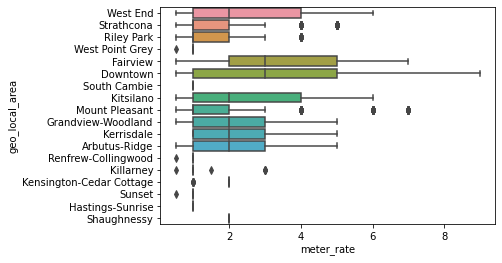

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
ax = sns.boxplot(y = 'geo_local_area', x = 'meter_rate', data = parking_meter)
plt.show()

        meter_rate     latitude
count  9975.000000  9975.000000
mean      2.731579    49.271827
std       1.945172     0.012945
min       0.500000    49.210697
25%       1.000000    49.263873
50%       2.000000    49.273992
75%       4.000000    49.281605
max       9.000000    49.293292


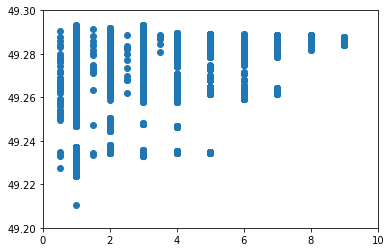

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
print( parking_meter[['meter_rate','latitude']].describe())
ax.set_xlim([0, 10])
ax.set_ylim([49.20, 49.30])
ax.scatter(parking_meter['meter_rate'], parking_meter['latitude'])